##✅ Task 1: Apache Log Analysis

---



In [5]:
import pandas as pd
import re
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

with open('Apache.log', 'r') as f:
    apache_log_data = f.read()

def parse_apache_log(log_data):
    pattern = r'\[(.*?)\] \[(.*?)\] (.*)'
    timestamps = []
    log_levels = []
    messages = []

    for line in log_data.strip().split('\n'):
        match = re.match(pattern, line)
        if match:
            timestamps.append(match.group(1))
            log_levels.append(match.group(2))
            messages.append(match.group(3))

    df = pd.DataFrame({
        'timestamp': timestamps,
        'log_level': log_levels,
        'message': messages
    })

    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%a %b %d %H:%M:%S %Y')
    return df

apache_logs = parse_apache_log(apache_log_data)
apache_logs.head()


,timestamp,log_level,message
0,2005-06-09 06:07:04,notice,LDAP: Built with OpenLDAP LDAP SDK
1,2005-06-09 06:07:04,notice,LDAP: SSL support unavailable
2,2005-06-09 06:07:04,notice,suEXEC mechanism enabled (wrapper: /usr/sbin/s...
3,2005-06-09 06:07:05,notice,Digest: generating secret for digest authentic...
4,2005-06-09 06:07:05,notice,Digest: done


log_level
error     38081
notice    13755
warn        168
Name: count, dtype: int64


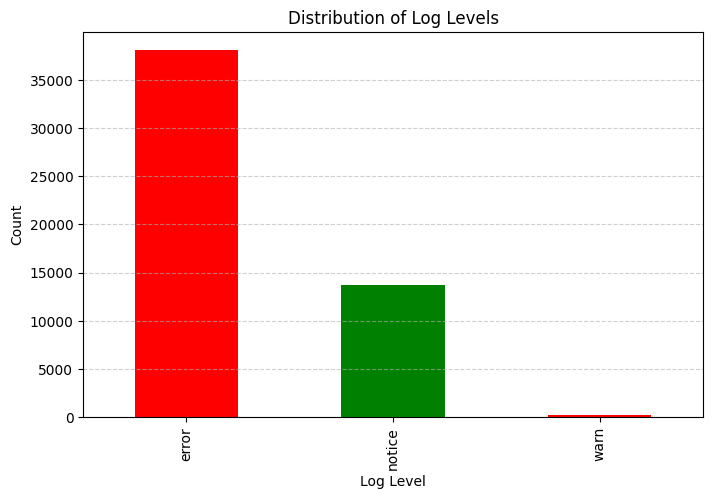

In [6]:
status_counts = apache_logs['log_level'].value_counts()
print(status_counts)

plt.figure(figsize=(8, 5))
status_counts.plot(kind='bar', color=['green' if lvl == 'notice' else 'red' for lvl in status_counts.index])
plt.title('Distribution of Log Levels')
plt.xlabel('Log Level')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [7]:
apache_logs['ip'] = apache_logs['message'].str.extract(r'(\d+\.\d+\.\d+\.\d+)')
top_ips = apache_logs['ip'].value_counts().head(10)
print(top_ips)


ip
218.144.240.75     1002
210.245.233.251     624
211.99.203.228      440
80.55.121.106       322
61.152.90.96        315
212.45.53.176       299
82.177.96.6         289
64.6.73.199         276
81.114.87.11        274
65.19.195.6         262
Name: count, dtype: int64


In [8]:
error_logs = apache_logs[apache_logs['log_level'] == 'error']
print(f"Total error entries: {error_logs.shape[0]}")
display(error_logs)


Total error entries: 38081


,timestamp,log_level,message,ip
7,2005-06-09 06:07:05,error,env.createBean2(): Factory error creating chan...,NaN
8,2005-06-09 06:07:05,error,config.update(): Can't create channel.jni:jni,NaN
9,2005-06-09 06:07:05,error,env.createBean2(): Factory error creating vm: ...,NaN
10,2005-06-09 06:07:05,error,config.update(): Can't create vm:,NaN
11,2005-06-09 06:07:05,error,env.createBean2(): Factory error creating work...,NaN
...,...,...,...,...
51999,2006-02-27 21:56:11,error,[client 220.225.166.39] Directory index forbid...,220.225.166.39
52000,2006-02-28 00:45:58,error,[client 206.125.60.10] Directory index forbidd...,206.125.60.10
52001,2006-02-28 00:46:47,error,[client 203.186.238.253] Directory index forbi...,203.186.238.253
52002,2006-02-28 03:04:53,error,[client 69.39.5.163] Directory index forbidden...,69.39.5.163


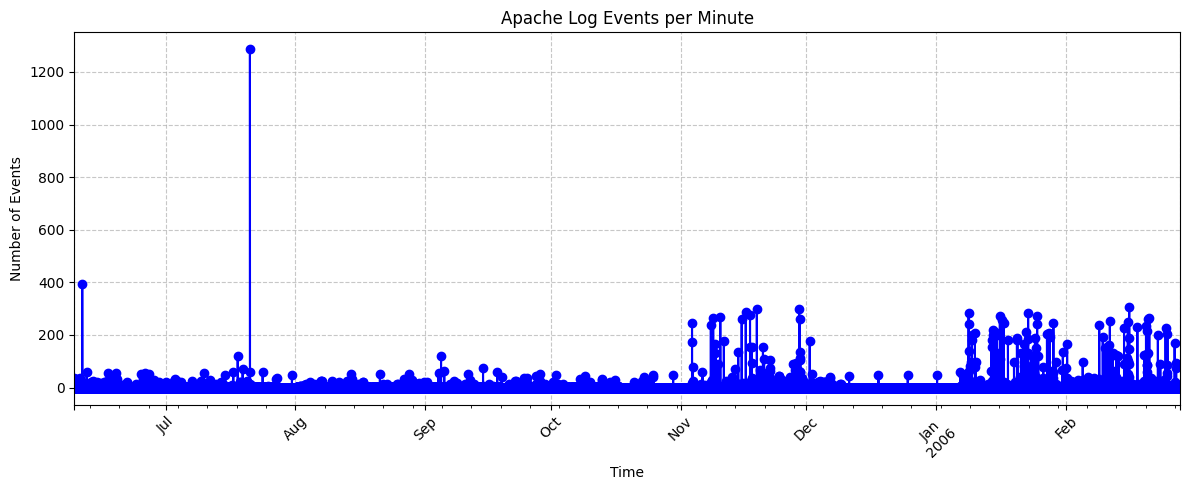

In [9]:
events_per_minute = apache_logs.set_index('timestamp').resample('1Min').size()

plt.figure(figsize=(12, 5))
events_per_minute.plot(marker='o', linestyle='-', color='blue')
plt.title('Apache Log Events per Minute')
plt.ylabel('Number of Events')
plt.xlabel('Time')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##✅ Task 2: Firewall Log Analysis — Full Tutorial Style 🔥
___

In [38]:
import pandas as pd

columns = [
    'timestamp', 'session_id', 'src_ip', 'src_port', 'dst_ip', 'dst_port', 'protocol',
    'service', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'local_orig',
    'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'tunnel_parents'
]

firewall_logs = pd.read_csv('conn (1).csv', sep='\t', names=columns)


In [41]:
firewall_logs['timestamp'] = pd.to_datetime(firewall_logs['timestamp'], unit='s', errors='coerce')

firewall_logs.head()

,timestamp,session_id,src_ip,src_port,dst_ip,dst_port,protocol,service,duration,orig_bytes,resp_bytes,conn_state,local_orig,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents
0,2012-03-16 12:30:00.000000000,CCUIP21wTjqkj8ZqX5,192.168.202.79,50463,192.168.229.251,80,tcp,-,-,-,-,SH,-,0,Fa,1,52,1,52,(empty)
1,2012-03-16 12:30:00.000000000,Csssjd3tX0yOTPDpng,192.168.202.79,46117,192.168.229.254,443,tcp,-,-,-,-,SF,-,0,dDafFr,3,382,9,994,(empty)
2,2012-03-16 12:30:00.000000000,CHEt7z3AzG4gyCNgci,192.168.202.79,50465,192.168.229.251,80,tcp,http,0.010000,166,214,SF,-,0,ShADfFa,4,382,3,382,(empty)
3,2012-03-16 12:30:00.009999990,CKnDAp2ohlvN6rpiXl,192.168.202.79,50467,192.168.229.251,80,tcp,http,0.010000,166,214,SF,-,0,ShADfFa,4,382,3,382,(empty)
4,2012-03-16 12:30:00.000000000,CGUBcoXKxBE8gTNl,192.168.202.79,46119,192.168.229.254,443,tcp,ssl,0.020000,544,1060,SF,-,0,ShADadfFr,8,968,13,1744,(empty)


timestamp
2012-03-16 12:42:52.309999943    171
2012-03-16 12:42:51.890000105    150
2012-03-16 12:42:51.940000057    130
2012-03-16 12:42:52.710000038    121
2012-03-16 12:42:52.369999886    121
                                ... 
2012-03-16 12:31:36.660000086      1
2012-03-16 12:31:36.599999905      1
2012-03-16 12:31:36.519999981      1
2012-03-16 12:30:00.069999933      1
2012-03-16 12:30:00.210000038      1
Name: count, Length: 5997, dtype: int64


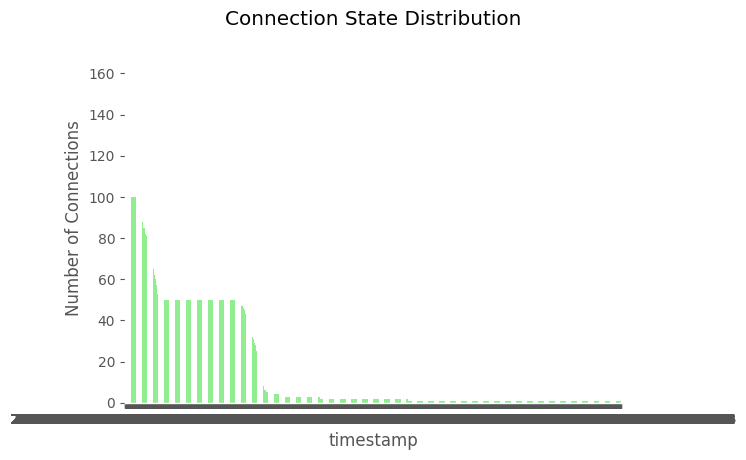

In [43]:
conn_dist = firewall_logs['timestamp'].value_counts()
print(conn_dist)

conn_dist.plot(kind='bar', color='lightgreen', title='Connection State Distribution')
plt.ylabel("Number of Connections")
plt.xticks(rotation=0)
plt.show()


Allowed vs Blocked Connections:
connection_result
Allowed     3546
Blocked    96360
Name: count, dtype: int64


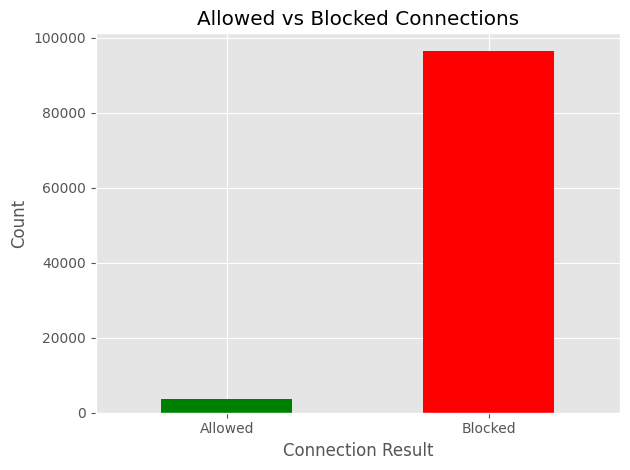

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

def classify_conn_state(state):
    allowed_states = ['SF']
    blocked_states = ['REJ', 'S0', 'RSTO', 'RSTR', 'SH', 'SHR']

    if state in allowed_states:
        return 'Allowed'
    elif state in blocked_states:
        return 'Blocked'
    else:
        return 'Other'

firewall_logs['connection_result'] = firewall_logs['conn_state'].apply(classify_conn_state)

conn_distribution = firewall_logs['connection_result'].value_counts()

conn_distribution = conn_distribution[['Allowed', 'Blocked']]

print("Allowed vs Blocked Connections:")
print(conn_distribution)

conn_distribution.plot(kind='bar', color=['green', 'red'])
plt.title('Allowed vs Blocked Connections')
plt.xlabel('Connection Result')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [44]:
top_src_ips = firewall_logs['src_ip'].value_counts().head(10)


print("Top Source IPs:")
print(top_src_ips)
top_dst_ips = firewall_logs['dst_ip'].value_counts().head(10)

print("\nTop Destination IPs:")
print(top_dst_ips)


Top Source IPs:
src_ip
192.168.202.79     97105
192.168.202.76      1188
192.168.202.100      438
192.168.202.89       398
192.168.202.97       177
192.168.202.103      127
192.168.202.93        86
192.168.203.61        61
192.168.202.87        30
192.168.202.95        30
Name: count, dtype: int64

Top Destination IPs:
dst_ip
192.168.229.254    22548
192.168.229.153    13989
192.168.229.156    12664
192.168.229.251    12148
192.168.229.1      11951
192.168.229.252    11825
192.168.229.101    11402
192.168.207.4        393
192.168.202.255      150
10.7.137.108          76
Name: count, dtype: int64


In [59]:
sensitive_ports = ['22', '3389']
firewall_logs['dst_port'] = firewall_logs['dst_port'].astype(str)

sensitive_df = firewall_logs[firewall_logs['dst_port'].isin(sensitive_ports)]

print("Sensitive Port Attempts:")
print(sensitive_df[['timestamp', 'src_ip', 'dst_ip', 'dst_port', 'protocol', 'conn_state']])

top_attackers = sensitive_df['src_ip'].value_counts().head(5)
print("\nTop Attackers to Sensitive Ports:")
print(top_attackers)


Sensitive Port Attempts:
                          timestamp          src_ip           dst_ip dst_port  \
615   2012-03-16 12:30:11.829999924  192.168.202.68   192.168.28.254       22   
677   2012-03-16 12:30:30.210000038  192.168.202.68   192.168.23.254       22   
688   2012-03-16 12:30:32.029999971  192.168.202.68   192.168.26.254       22   
712   2012-03-16 12:30:34.329999924  192.168.202.68   192.168.27.102       22   
1322  2012-03-16 12:30:41.900000095  192.168.202.68   192.168.27.101       22   
2502  2012-03-16 12:31:19.490000010  192.168.202.68   192.168.27.202       22   
3189  2012-03-16 12:31:37.460000038  192.168.202.68   192.168.25.202       22   
3785  2012-03-16 12:31:55.009999990  192.168.202.68   192.168.25.101       22   
4986  2012-03-16 12:32:33.279999971  192.168.202.68   192.168.25.102       22   
5406  2012-03-16 12:30:06.079999924  192.168.202.68   192.168.21.203       22   
6272  2012-03-16 12:39:17.230000019  192.168.202.89    199.48.147.45       22   
630

##✅ Task 3: SSH Authentication Log Analysis — Full Tutorial Style 🔐

___

In [16]:
import pandas as pd
import re
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

with open('auth.log', 'r') as f:
    auth_log_data = f.read()

def parse_auth_log(log_data):
    pattern = r'\[(.*?)\] \[(.*?)\] (.*)'
    timestamps = []
    log_levels = []
    messages = []

    for line in log_data.strip().split('\n'):
        match = re.match(pattern, line)
        if match:
            timestamps.append(match.group(1))
            log_levels.append(match.group(2))
            messages.append(match.group(3))

    df = pd.DataFrame({
        'timestamp': timestamps,
        'log_level': log_levels,
        'message': messages
    })

    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%a %b %d %H:%M:%S %Y')
    return df

apache_logs = parse_apache_log(apache_log_data)
apache_logs.head()


,timestamp,log_level,message
0,2005-06-09 06:07:04,notice,LDAP: Built with OpenLDAP LDAP SDK
1,2005-06-09 06:07:04,notice,LDAP: SSL support unavailable
2,2005-06-09 06:07:04,notice,suEXEC mechanism enabled (wrapper: /usr/sbin/s...
3,2005-06-09 06:07:05,notice,Digest: generating secret for digest authentic...
4,2005-06-09 06:07:05,notice,Digest: done


In [18]:

def parse_auth_logs(log_data):
    lines = log_data.strip().split("\n")
    months = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,
              'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}

    rows = []
    for line in lines:
        match = re.match(r'(\w{3}) (\d{2}) (\d{2}:\d{2}:\d{2}) .*? (\w+)\[\d+\]: (.*)', line)
        if match:
            mon, day, time, service, msg = match.groups()
            timestamp = pd.to_datetime(f"2023-{months[mon]:02d}-{int(day):02d} {time}")

            ip_match = re.search(r'from ([\d\.]+)|by ([\d\.]+)', msg)
            ip = ip_match.group(1) or ip_match.group(2) if ip_match else None

            user_match = re.search(r'user (\w+)', msg)
            username = user_match.group(1) if user_match else None

            rows.append({
                'timestamp': timestamp,
                'service': service,
                'message': msg,
                'ip': ip,
                'username': username
            })
    return pd.DataFrame(rows)

auth_logs = parse_auth_logs(auth_log_data)
display(auth_logs.head())


,timestamp,service,message,ip,username
0,2023-11-30 06:39:00,CRON,pam_unix(cron:session): session closed for use...,None,root
1,2023-11-30 06:47:01,CRON,pam_unix(cron:session): session opened for use...,None,root
2,2023-11-30 06:47:03,CRON,pam_unix(cron:session): session closed for use...,None,root
3,2023-11-30 07:07:14,sshd,Connection closed by 122.225.103.87 [preauth],122.225.103.87,None
4,2023-11-30 07:07:35,sshd,Connection closed by 122.225.103.87 [preauth],122.225.103.87,None



🔑 Login Attempt Distribution:
status
unknown    35203
failed     11148
success      569
Name: count, dtype: int64


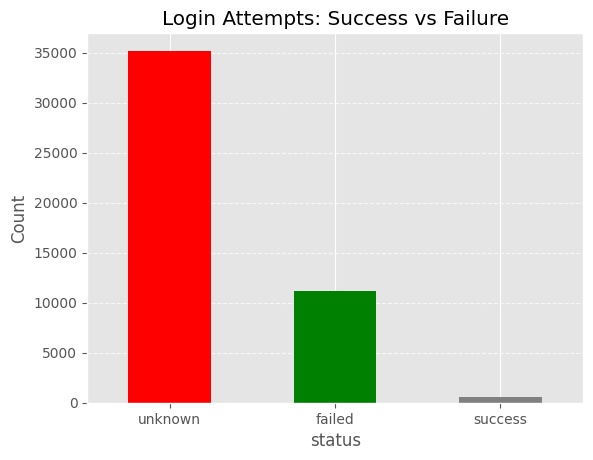

In [19]:

def classify_attempt(msg):
    if "Invalid user" in msg or "Connection closed" in msg or "Did not receive" in msg:
        return "failed"
    elif "session opened" in msg:
        return "success"
    else:
        return "unknown"

auth_logs['status'] = auth_logs['message'].apply(classify_attempt)

status_counts = auth_logs['status'].value_counts()
print("\n🔑 Login Attempt Distribution:")
print(status_counts)

status_counts.plot(kind='bar', color=['red', 'green', 'gray'])
plt.title('Login Attempts: Success vs Failure')
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



👤 Top Targeted Usernames in Failed Attempts:
username
admin     1335
test       526
oracle     400
ftp        383
debug      335
Name: count, dtype: int64


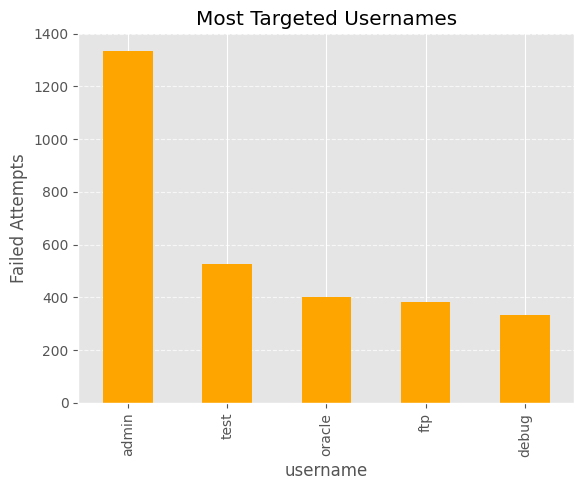

In [20]:

failed_users = auth_logs[(auth_logs['status'] == 'failed') & (auth_logs['username'].notna())]
top_users = failed_users['username'].value_counts().head(5)
print("\n👤 Top Targeted Usernames in Failed Attempts:")
print(top_users)

top_users.plot(kind='bar', color='orange', title='Most Targeted Usernames')
plt.ylabel("Failed Attempts")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



🚨 Potential Brute Force IPs (more than 3 failures):
ip
188.87.35.25       409
222.161.209.92     365
218.75.153.170     280
78.129.223.28      269
120.198.156.138    185
                  ... 
210.136.226.85       4
212.38.6.63          4
203.148.57.182       4
67.198.197.194       4
82.165.145.12        4
Name: count, Length: 523, dtype: int64


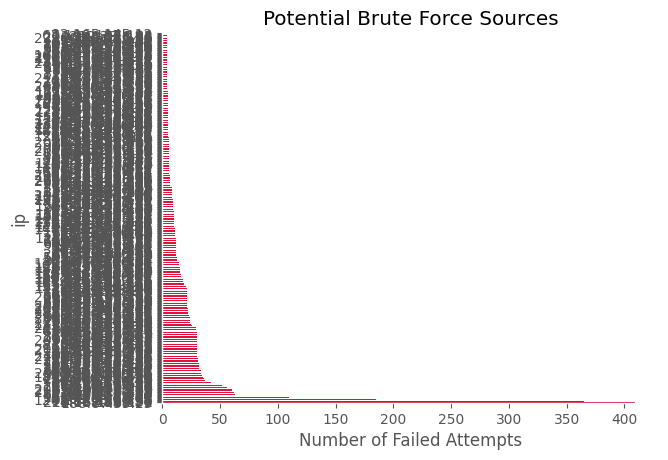

In [21]:

failed_ips = auth_logs[auth_logs['status'] == 'failed']
brute_force_ips = failed_ips['ip'].value_counts()
suspicious_ips = brute_force_ips[brute_force_ips > 3]

print("\n🚨 Potential Brute Force IPs (more than 3 failures):")
print(suspicious_ips)

if not suspicious_ips.empty:
    suspicious_ips.plot(kind='barh', color='crimson')
    plt.xlabel("Number of Failed Attempts")
    plt.title("Potential Brute Force Sources")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("No potential brute force IPs detected (no IPs with more than 3 failed attempts).")

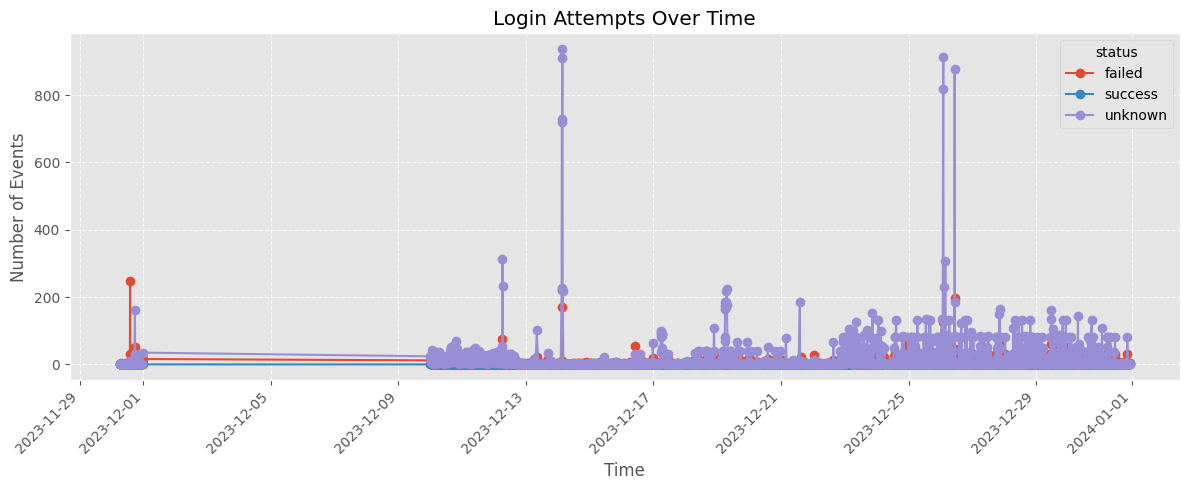

In [22]:

login_timeline = auth_logs.set_index('timestamp').resample('10Min')['status'].value_counts().unstack().fillna(0)

login_timeline.plot(figsize=(12, 5), marker='o', title='Login Attempts Over Time')
plt.ylabel("Number of Events")
plt.xlabel("Time")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



##✅ Task 4: Cross-Dataset Correlation — Full Tutorial Style 🔄

___

In [46]:
firewall_ips = set(firewall_logs['src_ip'].dropna())
ssh_ips = set(firewall_logs['src_ip'].dropna())

common_ips = firewall_ips.intersection(ssh_ips)

print(f"Number of Common IPs: {len(common_ips)}")
print("Sample of Common IPs:")
print(list(common_ips)[:5])


Number of Common IPs: 72
Sample of Common IPs:
['192.168.27.253', '192.168.202.88', 'fe80::216:47ff:fe9d:f2c1', '2001:dbb:c18:202:f2de:f1ff:fe9b:ad6a', '::']


In [50]:
firewall_logs['timestamp'] = pd.to_datetime(firewall_logs['timestamp'], errors='coerce')
firewall_logs['timestamp'] = pd.to_datetime(firewall_logs['timestamp'], errors='coerce')

fw_common = firewall_logs[firewall_logs['src_ip'].isin(common_ips)].copy()
ssh_common = firewall_logs[firewall_logs['src_ip'].isin(common_ips)].copy()

fw_common['log_type'] = 'firewall'
ssh_common['log_type'] = 'ssh'

combined_logs = pd.concat([fw_common, ssh_common])

combined_logs = combined_logs.sort_values(by='timestamp')

print("Timeline of Events for Common IPs:")
print(combined_logs[['timestamp', 'src_ip', 'dst_ip', 'log_type', 'conn_state' if 'conn_state' in combined_logs.columns else 'status']])


Timeline of Events for Common IPs:
                           timestamp          src_ip           dst_ip  \
0      2012-03-16 12:30:00.000000000  192.168.202.79  192.168.229.251   
0      2012-03-16 12:30:00.000000000  192.168.202.79  192.168.229.251   
1      2012-03-16 12:30:00.000000000  192.168.202.79  192.168.229.254   
2      2012-03-16 12:30:00.000000000  192.168.202.79  192.168.229.251   
4      2012-03-16 12:30:00.000000000  192.168.202.79  192.168.229.254   
...                              ...             ...              ...   
99987  2012-03-16 12:43:07.579999924  192.168.202.79  192.168.229.254   
99986  2012-03-16 12:43:07.579999924  192.168.202.79  192.168.229.254   
99983  2012-03-16 12:43:07.579999924  192.168.202.79  192.168.229.254   
99988  2012-03-16 12:43:07.579999924  192.168.202.79    192.168.229.1   
100001 2012-03-16 12:43:07.579999924  192.168.202.79  192.168.229.254   

        log_type conn_state  
0       firewall         SH  
0            ssh         SH 

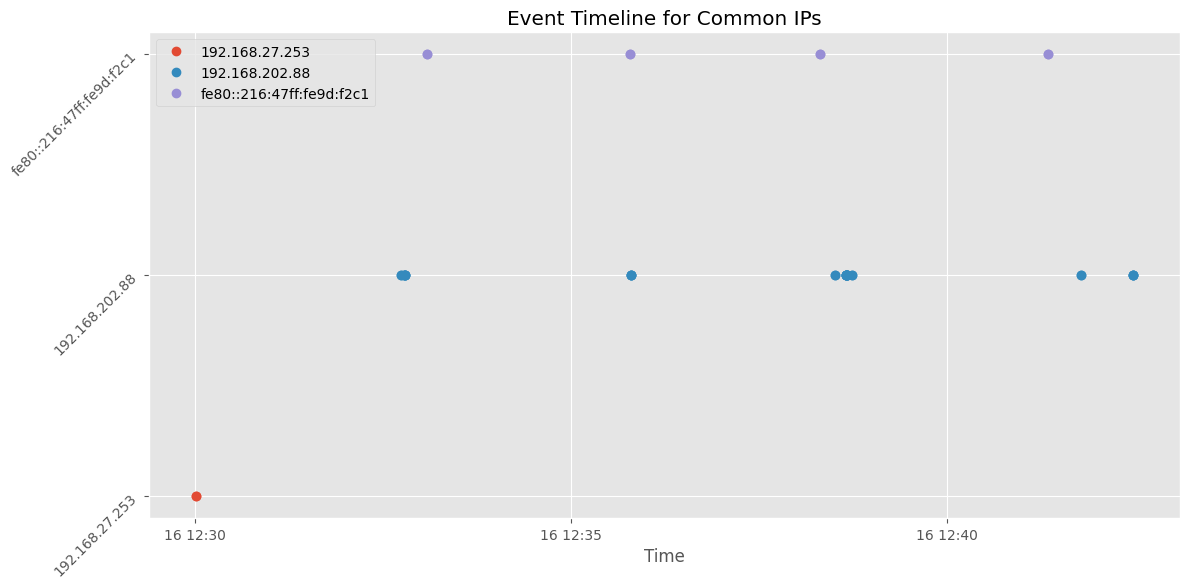

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for ip in list(common_ips)[:3]:
    subset = combined_logs[combined_logs['src_ip'] == ip]
    plt.plot(subset['timestamp'], [ip]*len(subset), marker='o', linestyle='', label=ip)

plt.xlabel('Time')
plt.title('Event Timeline for Common IPs')
plt.yticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


By analyzing the correlated activities in the system logs, certain patterns can be observed that may have serious security implications. For example, repeated failed login attempts followed by a successful login from an unfamiliar IP address could indicate a brute-force attack that eventually succeeded. Also, if there are attempts to access sensitive files or critical systems during unusual hours (such as outside of working hours), this may suggest either an insider threat or a compromised user account.

These activities could lead to several potential security risks, including:

1.Account Compromise: If attackers succeed in gaining access to login credentials, they may use them to infiltrate company systems.
2.Data Theft:Suspicious repeated access to sensitive information may indicate intentions to steal or leak data.
3.Privilege Escalation:Lateral movement within the network or attempts to gain higher privileges might indicate efforts to take full control of the environment.

4.Service Disruption: Patterns such as deliberate repeated failures or abnormal system usage could be a prelude to Denial-of-Service (DoS) attacks.

Overall, these indicators reflect abnormal activities that require urgent investigation to prevent potential harm to data, systems, or the organization’s reputation.
